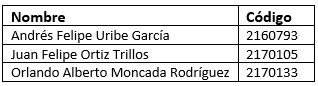

In [1]:
#@title Drive
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
Root = "/content/drive/MyDrive"
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive


In [2]:
# @title Librerias

import sys
import time
import re
import librosa
import librosa.display
import random
import numpy as np
import pandas as pd
from keras import backend as K
from tqdm import tqdm

from keras.preprocessing import image

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

from sklearn import metrics
from sklearn import datasets
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import IPython.display as ipd
from IPython.display import clear_output

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
#@title Constantes
path_img='/content/drive/MyDrive/Proyecto/Data/images_original/'
path_img2='/content/drive/MyDrive/Proyecto/Data2/images_original/'

categories= {0: 'blues', 1: 'classical', 2: 'country',
          3: 'disco', 4: 'hiphop',5: 'jazz', 6: 'metal',
          7: 'pop', 8: 'reggae', 9: 'rock'}

In [4]:
#@title Creación del dataframe
def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df

filenames_list = []
categories_list = []

for category in categories:
    filenames = os.listdir(path_img + categories[category])
    
    filenames_list = filenames_list  +filenames
    categories_list = categories_list + [category] * len(filenames)
    
df = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

df = add_class_name_prefix(df, 'filename')

df = df.sample(frac=1).reset_index(drop=True)

print('number of elements = ' , len(df))

number of elements =  999


In [5]:
#@title  Muestra del DF creado
df.head()

,filename,category
0,hiphop/hiphop00018.png,4
1,pop/pop00052.png,7
2,jazz/jazz00007.png,5
3,reggae/reggae00086.png,8
4,jazz/jazz00025.png,5


pop/pop00052.png


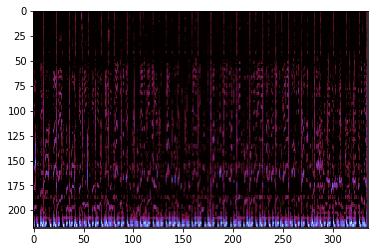

In [11]:
#@title Visualización de una imagen aleatoria
random_row = random.randint(0, len(df)-1)
sample = df.iloc[1]
print(sample['filename'])
import cv2

img = cv2.imread(path_img + sample['filename'])
crop_img = img[35:253, 54:390]
cv2.imwrite(path_img2 + sample['filename'], crop_img)
plt.imshow(crop_img)

reggae/reggae00061.png
Van 999 de 999


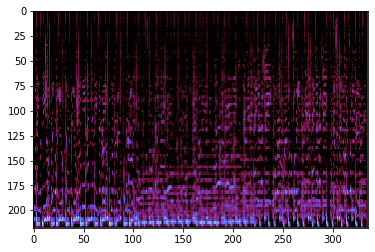

In [40]:
cuatos=0
for nombres in df['filename']:
    #random_row = random.randint(0, len(df)-1)
    #sample = df.iloc[1]
    #print(sample['filename'])
    clear_output(wait=True)
    img = cv2.imread(path_img + nombres)
    crop_img = img[35:253, 54:390]
    cv2.imwrite(path_img2 + nombres, crop_img)
    plt.imshow(crop_img)
    print(nombres)
    cuatos = cuatos+1
    print('Van ' + str(cuatos) + ' de 999')